To construct and characterize clusters for these players, we will be using Jae Bradley's Basketball Reference Web Scraper. First we have to install it.

In [28]:
pip install basketball_reference_web_scraper

Next we import the necessary modules. We will use pandas to create dataframes, numpy for the math we will be doing, and client ("bkref") to retrieve data from Basketball Reference. We also need time and requests to help deal with rate-limiting. KMeans and pyplot ("plt") all help with clustering.

In [67]:
from basketball_reference_web_scraper import client as bkref
import pandas as pd
import numpy as np
import time
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

With bkref we can get the advanced stats of every player from the past NBA season (2023-24). We will also get the season totals and box scores of each player for some future calculations.

In [30]:
advanced_stats = pd.DataFrame(
    bkref.players_advanced_season_totals(
        season_end_year=2024
        )
    )
advanced_stats

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals
0,derozde01,DeMar DeRozan,[Position.SMALL_FORWARD],34,Team.CHICAGO_BULLS,79,2989,19.7,0.584,0.166,...,25.8,7.0,2.2,9.2,0.147,2.1,-0.3,1.8,2.8,False
1,sabondo01,Domantas Sabonis,[Position.CENTER],27,Team.SACRAMENTO_KINGS,82,2928,23.2,0.637,0.081,...,22.2,8.6,4.0,12.6,0.206,4.0,2.4,6.5,6.2,False
2,whiteco01,Coby White,[Position.POINT_GUARD],23,Team.CHICAGO_BULLS,79,2881,14.5,0.570,0.460,...,22.7,3.1,1.6,4.7,0.078,0.7,-1.3,-0.7,0.9,False
3,bridgmi01,Mikal Bridges,[Position.SMALL_FORWARD],27,Team.BROOKLYN_NETS,82,2854,14.9,0.560,0.457,...,24.3,2.1,2.1,4.2,0.070,0.7,-1.0,-0.4,1.2,False
4,banchpa01,Paolo Banchero,[Position.POWER_FORWARD],21,Team.ORLANDO_MAGIC,80,2799,17.3,0.546,0.249,...,29.7,1.3,4.0,5.3,0.090,1.3,0.0,1.3,2.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,cazalma01,Malcolm Cazalon,[Position.SHOOTING_GUARD],22,Team.DETROIT_PISTONS,1,3,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,-0.012,-6.0,-3.2,-9.1,0.0,False
653,crutcja01,Jalen Crutcher,[Position.POINT_GUARD],24,Team.NEW_ORLEANS_PELICANS,1,3,-12.6,0.000,0.000,...,14.5,0.0,0.0,0.0,-0.334,-18.5,-7.8,-26.2,0.0,False
654,skapidm01,Dmytro Skapintsev,[Position.CENTER],25,Team.NEW_YORK_KNICKS,2,2,-19.3,0.000,0.000,...,21.6,0.0,0.0,0.0,-0.483,-16.0,-9.8,-25.9,0.0,False
655,jacksju01,Justin Jackson,[Position.SMALL_FORWARD],28,Team.MINNESOTA_TIMBERWOLVES,2,1,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.031,-6.3,-1.2,-7.5,0.0,False


In [31]:
total_stats = pd.DataFrame(
    bkref.players_season_totals(
        season_end_year=2024
        )
    )
total_stats

,slug,name,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,...,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,doncilu01,Luka Dončić,[Position.POINT_GUARD],24,Team.DALLAS_MAVERICKS,70,70,2624,804,1652,...,478,608,59,588,686,99,38,282,149,2370
1,gilgesh01,Shai Gilgeous-Alexander,[Position.POINT_GUARD],25,Team.OKLAHOMA_CITY_THUNDER,75,75,2553,796,1487,...,567,649,65,350,465,150,67,162,184,2254
2,antetgi01,Giannis Antetokounmpo,[Position.POWER_FORWARD],29,Team.MILWAUKEE_BUCKS,73,73,2567,837,1369,...,514,782,196,645,476,87,79,250,210,2222
3,brunsja01,Jalen Brunson,[Position.POINT_GUARD],27,Team.NEW_YORK_KNICKS,77,77,2726,790,1648,...,421,497,43,235,519,70,13,186,144,2212
4,jokicni01,Nikola Jokić,[Position.CENTER],28,Team.DENVER_NUGGETS,79,79,2737,822,1411,...,358,438,223,753,708,108,68,237,194,2085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,greenda02,Danny Green,[Position.SHOOTING_GUARD],36,Team.PHILADELPHIA_76ERS,2,0,18,0,2,...,0,0,0,2,1,1,0,0,1,0
653,harpero02,Ron Harper Jr.,[Position.POWER_FORWARD],23,Team.TORONTO_RAPTORS,1,0,4,0,0,...,0,0,0,0,1,0,0,0,2,0
654,jacksju01,Justin Jackson,[Position.SMALL_FORWARD],28,Team.MINNESOTA_TIMBERWOLVES,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
655,skapidm01,Dmytro Skapintsev,[Position.CENTER],25,Team.NEW_YORK_KNICKS,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# There are some/one player(s) with incomplete slugs. Just add a 1 at the end
advanced_stats.loc[advanced_stats['slug'].str.endswith('0'), 'slug'] += "1"
total_stats.loc[total_stats['slug'].str.endswith('0'), 'slug'] += "1"

In [33]:
dict_of_box_scores = {}
for player in advanced_stats["slug"]:
    dict_of_box_scores[player] = pd.DataFrame(
        bkref.regular_season_player_box_scores(
            player_identifier=player,
            season_end_year=2024
            )
        )
    time.sleep(5) # I kept getting rate-limited :(. This took/will take an hour

In [35]:
team_box_scores = {}
start = pd.to_datetime("2023-10-24")
end = pd.to_datetime("2024-04-14")
delay = 30
for today in pd.date_range(start=start, end=end):
  while True:
    try:
      today_team_box_scores = bkref.team_box_scores(
          day=today.day,
          month=today.month,
          year=today.year
          )
      time.sleep(delay) # I am tired
      team_box_scores[today.strftime('%Y-%m-%d')] = today_team_box_scores
      break
    except requests.exceptions.HTTPError as e:
      if e.response.status_code == 429:
        delay += 5
        time.sleep(3600)
      else:
        raise e


In [36]:
team_box_scores

{'2023-10-24': [{'team': <Team.LOS_ANGELES_LAKERS: 'LOS ANGELES LAKERS'>,
   'outcome': <Outcome.LOSS: 'LOSS'>,
   'minutes_played': 240,
   'made_field_goals': 41,
   'attempted_field_goals': 90,
   'made_three_point_field_goals': 10,
   'attempted_three_point_field_goals': 29,
   'made_free_throws': 15,
   'attempted_free_throws': 20,
   'offensive_rebounds': 13,
   'defensive_rebounds': 31,
   'assists': 23,
   'steals': 5,
   'blocks': 4,
   'turnovers': 12,
   'personal_fouls': 18,
   'points': 107},
  {'team': <Team.DENVER_NUGGETS: 'DENVER NUGGETS'>,
   'outcome': <Outcome.WIN: 'WIN'>,
   'minutes_played': 240,
   'made_field_goals': 48,
   'attempted_field_goals': 91,
   'made_three_point_field_goals': 14,
   'attempted_three_point_field_goals': 34,
   'made_free_throws': 9,
   'attempted_free_throws': 12,
   'offensive_rebounds': 9,
   'defensive_rebounds': 33,
   'assists': 29,
   'steals': 9,
   'blocks': 6,
   'turnovers': 12,
   'personal_fouls': 15,
   'points': 119},
  {'

In [37]:
total_stats["Team MP"] = 0
total_stats["Team FG"] = 0
total_stats["Team ORB"] = 0
total_stats["Opp DRB"] = 0
total_stats["Team FGA"] = 0
total_stats["Team FTA"] = 0
total_stats["Team TOV"] = 0

for player in total_stats["slug"]:
  player_box_scores = dict_of_box_scores[player]
  for date in player_box_scores["date"]:
    box_scores = team_box_scores[date.strftime('%Y-%m-%d')]
    team = player_box_scores[player_box_scores["date"] == date]["team"].iloc[0]
    opp = player_box_scores[player_box_scores["date"] == date]["opponent"].iloc[0]
    team_box_score = [game for game in box_scores if game["team"] == team][0]
    opp_box_score = [game for game in box_scores if game["team"] == opp][0]

    total_stats.loc[total_stats["slug"] == player, "Team MP"] += team_box_score["minutes_played"]
    total_stats.loc[total_stats["slug"] == player, "Team FG"] += team_box_score["made_field_goals"]
    total_stats.loc[total_stats["slug"] == player, "Team ORB"] += team_box_score["offensive_rebounds"]
    total_stats.loc[total_stats["slug"] == player, "Opp DRB"] += opp_box_score["defensive_rebounds"]
    total_stats.loc[total_stats["slug"] == player, "Team FGA"] += team_box_score["attempted_field_goals"]
    total_stats.loc[total_stats["slug"] == player, "Team FTA"] += team_box_score["attempted_free_throws"]
    total_stats.loc[total_stats["slug"] == player, "Team TOV"] += team_box_score["turnovers"]

In [38]:
total_stats

,slug,name,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,...,turnovers,personal_fouls,points,Team MP,Team FG,Team ORB,Opp DRB,Team FGA,Team FTA,Team TOV
0,doncilu01,Luka Dončić,[Position.POINT_GUARD],24,Team.DALLAS_MAVERICKS,70,70,2624,804,1652,...,282,149,2370,16825,3068,666,2379,6294,1574,845
1,gilgesh01,Shai Gilgeous-Alexander,[Position.POINT_GUARD],25,Team.OKLAHOMA_CITY_THUNDER,75,75,2553,796,1487,...,162,184,2254,18100,3348,659,2482,6717,1600,929
2,antetgi01,Giannis Antetokounmpo,[Position.POWER_FORWARD],29,Team.MILWAUKEE_BUCKS,73,73,2567,837,1369,...,250,210,2222,17645,3167,691,2468,6484,1796,934
3,brunsja01,Jalen Brunson,[Position.POINT_GUARD],27,Team.NEW_YORK_KNICKS,77,77,2726,790,1648,...,186,144,2212,18530,3201,967,2327,6830,1703,1013
4,jokicni01,Nikola Jokić,[Position.CENTER],28,Team.DENVER_NUGGETS,79,79,2737,822,1411,...,237,194,2085,18985,3488,832,2471,7003,1551,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,greenda02,Danny Green,[Position.SHOOTING_GUARD],36,Team.PHILADELPHIA_76ERS,2,0,18,0,2,...,0,1,0,480,84,13,63,166,49,26
653,harpero02,Ron Harper Jr.,[Position.POWER_FORWARD],23,Team.TORONTO_RAPTORS,1,0,4,0,0,...,0,2,0,240,55,12,34,102,29,8
654,jacksju01,Justin Jackson,[Position.SMALL_FORWARD],28,Team.MINNESOTA_TIMBERWOLVES,2,0,1,0,0,...,0,0,0,480,79,17,74,177,40,27
655,skapidm01,Dmytro Skapintsev,[Position.CENTER],25,Team.NEW_YORK_KNICKS,2,0,2,0,1,...,0,0,0,480,86,26,68,188,48,25


Some players were traded during the season. This data set has their data separated for each team. We want these rows to be merged, so we are going to group by slug.

Before we do that, though, we should remove all the columns we don't need. We only need slugs (player ID), names (a more readable player ID), three-point attempt rate, assist percentage, free throw attempt rate, offensive rebound percentage, turnover percentage, and usage percentage.

We will also do this for the total stats data frame. In that frame, we will be keeping the following stats:

*   field goal attempts
*   team field goal attempts
*   free throw attempts
*   team free throw attempts
*   turnovers
*   team turnovers
*   minutes
*   team minutes
*   offensive rebounds
*   team offensive rebounds
*   opponent defensive rebounds
*   assists
*   field goals
*   team field goals
*   three-point attempts

in addition to slugs ane names.

In [43]:
selected_advanced_stats = advanced_stats[[
    "slug",
    "name",
    "three_point_attempt_rate",
    "assist_percentage",
    "free_throw_attempt_rate",
    "offensive_rebound_percentage",
    "turnover_percentage",
    "usage_percentage"
    ]]
selected_advanced_stats

,slug,name,three_point_attempt_rate,assist_percentage,free_throw_attempt_rate,offensive_rebound_percentage,turnover_percentage,usage_percentage
0,derozde01,DeMar DeRozan,0.166,21.8,0.452,1.6,7.7,25.8
1,sabondo01,Domantas Sabonis,0.081,33.9,0.389,11.0,17.9,22.2
2,whiteco01,Coby White,0.460,20.8,0.215,1.7,11.1,22.7
3,bridgmi01,Mikal Bridges,0.457,16.3,0.245,2.5,10.3,24.3
4,banchpa01,Paolo Banchero,0.249,25.2,0.397,3.4,13.0,29.7
...,...,...,...,...,...,...,...,...
652,cazalma01,Malcolm Cazalon,0.000,0.0,0.000,0.0,0.0,0.0
653,crutcja01,Jalen Crutcher,0.000,0.0,0.000,0.0,0.0,14.5
654,skapidm01,Dmytro Skapintsev,0.000,0.0,0.000,0.0,0.0,21.6
655,jacksju01,Justin Jackson,0.000,0.0,0.000,0.0,0.0,0.0


In [48]:
grouped_advanced_stats = selected_advanced_stats.groupby(
    "slug",
    as_index=False
    ).first()
grouped_advanced_stats

,slug,name,three_point_attempt_rate,assist_percentage,free_throw_attempt_rate,offensive_rebound_percentage,turnover_percentage,usage_percentage
0,achiupr01,Precious Achiuwa,0.276,14.5,0.247,12.3,13.3,21.2
1,adebaba01,Bam Adebayo,0.041,18.9,0.381,7.4,12.0,24.9
2,agbajoc01,Ochai Agbaji,0.570,6.1,0.080,3.9,11.7,12.2
3,aldamsa01,Santi Aldama,0.535,13.3,0.153,4.7,10.2,17.9
4,alexani01,Nickeil Alexander-Walker,0.623,14.5,0.121,2.2,11.8,14.8
...,...,...,...,...,...,...,...,...
567,youngth01,Thaddeus Young,0.069,19.8,0.138,8.9,10.7,12.6
568,youngtr01,Trae Young,0.465,45.1,0.404,1.2,16.5,30.5
569,yurtsom01,Omer Yurtseven,0.130,7.7,0.152,14.7,15.9,17.9
570,zelleco01,Cody Zeller,0.048,15.2,0.613,16.9,16.9,12.9


In [42]:
selected_total_stats = total_stats[[
    "slug",
    "name",
    "attempted_field_goals",
    "Team FGA",
    "attempted_free_throws",
    "Team FTA",
    "turnovers",
    "Team TOV",
    "minutes_played",
    "Team MP",
    "offensive_rebounds",
    "Team ORB",
    "Opp DRB",
    "assists",
    "made_field_goals",
    "Team FG",
    "attempted_three_point_field_goals"
    ]]
selected_total_stats

,slug,name,attempted_field_goals,Team FGA,attempted_free_throws,Team FTA,turnovers,Team TOV,minutes_played,Team MP,offensive_rebounds,Team ORB,Opp DRB,assists,made_field_goals,Team FG,attempted_three_point_field_goals
0,doncilu01,Luka Dončić,1652,6294,608,1574,282,845,2624,16825,59,666,2379,686,804,3068,744
1,gilgesh01,Shai Gilgeous-Alexander,1487,6717,649,1600,162,929,2553,18100,65,659,2482,465,796,3348,269
2,antetgi01,Giannis Antetokounmpo,1369,6484,782,1796,250,934,2567,17645,196,691,2468,476,837,3167,124
3,brunsja01,Jalen Brunson,1648,6830,497,1703,186,1013,2726,18530,43,967,2327,519,790,3201,526
4,jokicni01,Nikola Jokić,1411,7003,438,1551,237,1001,2737,18985,223,832,2471,708,822,3488,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,greenda02,Danny Green,2,166,0,49,0,26,18,480,0,13,63,1,0,84,1
653,harpero02,Ron Harper Jr.,0,102,0,29,0,8,4,240,0,12,34,1,0,55,0
654,jacksju01,Justin Jackson,0,177,0,40,0,27,1,480,0,17,74,0,0,79,0
655,skapidm01,Dmytro Skapintsev,1,188,0,48,0,25,2,480,0,26,68,0,0,86,0


In [49]:
grouped_total_stats = selected_total_stats.groupby("slug", as_index=False).agg(
    {
        'name' : 'first',
        **{col: 'sum' for col in selected_total_stats.columns[2:]}
    }
)
grouped_total_stats

,slug,name,attempted_field_goals,Team FGA,attempted_free_throws,Team FTA,turnovers,Team TOV,minutes_played,Team MP,offensive_rebounds,Team ORB,Opp DRB,assists,made_field_goals,Team FG,attempted_three_point_field_goals
0,achiupr01,Precious Achiuwa,469,26284,112,6092,83,3956,1624,71340,191,3732,9276,97,235,12260,97
1,adebaba01,Bam Adebayo,1017,6088,387,1562,162,893,2416,17115,159,667,2405,278,530,2819,42
2,agbajoc01,Ochai Agbaji,433,28196,56,6972,64,4832,1641,75480,74,3728,10104,83,178,13164,211
3,aldamsa01,Santi Aldama,568,5323,87,1334,69,908,1618,14715,72,629,2128,138,247,2330,304
4,alexani01,Nickeil Alexander-Walker,538,6974,65,1881,76,1162,1921,19805,35,770,2555,204,236,3383,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,youngth01,Thaddeus Young,108,11676,15,2848,15,1788,439,31880,46,1392,4440,57,65,5588,7
568,youngtr01,Trae Young,1008,5046,407,1357,235,731,1942,13060,23,693,1810,583,433,2364,469
569,yurtsom01,Omer Yurtseven,184,4312,28,1027,37,779,545,11545,72,579,1530,29,99,1997,24
570,zelleco01,Cody Zeller,62,3867,38,967,16,569,320,10345,48,490,1403,39,26,1891,3


Now, we join the data frames.

In [54]:
all_stats = pd.merge(
    grouped_advanced_stats,
    grouped_total_stats,
    on="slug"
    ).drop(columns=["name_y"]).rename(columns={'name_x' : 'name'})
all_stats

,slug,name,three_point_attempt_rate,assist_percentage,free_throw_attempt_rate,offensive_rebound_percentage,turnover_percentage,usage_percentage,attempted_field_goals,Team FGA,...,Team TOV,minutes_played,Team MP,offensive_rebounds,Team ORB,Opp DRB,assists,made_field_goals,Team FG,attempted_three_point_field_goals
0,achiupr01,Precious Achiuwa,0.276,14.5,0.247,12.3,13.3,21.2,469,26284,...,3956,1624,71340,191,3732,9276,97,235,12260,97
1,adebaba01,Bam Adebayo,0.041,18.9,0.381,7.4,12.0,24.9,1017,6088,...,893,2416,17115,159,667,2405,278,530,2819,42
2,agbajoc01,Ochai Agbaji,0.570,6.1,0.080,3.9,11.7,12.2,433,28196,...,4832,1641,75480,74,3728,10104,83,178,13164,211
3,aldamsa01,Santi Aldama,0.535,13.3,0.153,4.7,10.2,17.9,568,5323,...,908,1618,14715,72,629,2128,138,247,2330,304
4,alexani01,Nickeil Alexander-Walker,0.623,14.5,0.121,2.2,11.8,14.8,538,6974,...,1162,1921,19805,35,770,2555,204,236,3383,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,youngth01,Thaddeus Young,0.069,19.8,0.138,8.9,10.7,12.6,108,11676,...,1788,439,31880,46,1392,4440,57,65,5588,7
568,youngtr01,Trae Young,0.465,45.1,0.404,1.2,16.5,30.5,1008,5046,...,731,1942,13060,23,693,1810,583,433,2364,469
569,yurtsom01,Omer Yurtseven,0.130,7.7,0.152,14.7,15.9,17.9,184,4312,...,779,545,11545,72,579,1530,29,99,1997,24
570,zelleco01,Cody Zeller,0.048,15.2,0.613,16.9,16.9,12.9,62,3867,...,569,320,10345,48,490,1403,39,26,1891,3


We can now do the calculations for the six stats we need.

In [55]:
all_stats.columns

Index(['slug', 'name', 'three_point_attempt_rate', 'assist_percentage',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'turnover_percentage', 'usage_percentage', 'attempted_field_goals',
       'Team FGA', 'attempted_free_throws', 'Team FTA', 'turnovers',
       'Team TOV', 'minutes_played', 'Team MP', 'offensive_rebounds',
       'Team ORB', 'Opp DRB', 'assists', 'made_field_goals', 'Team FG',
       'attempted_three_point_field_goals'],
      dtype='object')

In [61]:
# Define functions for each stat
def calculate_three_point_attempt_rate(row):
    try:
      return (100 * row["attempted_three_point_field_goals"] /
              row["attempted_field_goals"])
    except ZeroDivisionError:
      return 0

def calculate_assist_percentage(row):
    try:
      return (100 * row["assists"] /
      (((row["minutes_played"] /
          (row["Team MP"] / 5)) * row["Team FG"]) - row["made_field_goals"]))
    except ZeroDivisionError:
      return 0

def calculate_free_throw_attempt_rate(row):
    try:
      return 100 * row["attempted_free_throws"] / row["attempted_field_goals"]
    except ZeroDivisionError:
      return 0

def calculate_offensive_rebound_percentage(row):
    try:
      return (100 * (row["offensive_rebounds"] * (row["Team MP"] / 5)) /
              (row["minutes_played"] * (row["Team ORB"] + row["Opp DRB"])))
    except ZeroDivisionError:
      return 0

def calculate_turnover_percentage(row):
    try:
      return (100 * row["turnovers"] /
      (row["attempted_field_goals"] +
        0.44 * row["attempted_free_throws"] + row["turnovers"]))
    except ZeroDivisionError:
      return 0

def calculate_usage_percentage(row):
    try:
      return (100 * ((row["attempted_field_goals"] +
                      0.44 * row["attempted_free_throws"] +
                      row["turnovers"]) * (row["Team MP"] / 5)) /
                      (row["minutes_played"] * (row["Team FGA"] +
                                                0.44 * row["Team FTA"] +
                                                row["Team TOV"])))
    except ZeroDivisionError:
      return 0

# Now apply all the formulae to the appropriate columns
all_stats["three_point_attempt_rate"] = all_stats.apply(
    calculate_three_point_attempt_rate,
    axis=1
    )
all_stats["assist_percentage"] = all_stats.apply(
    calculate_assist_percentage,
    axis=1
    )
all_stats["free_throw_attempt_rate"] = all_stats.apply(
    calculate_free_throw_attempt_rate,
    axis=1
    )
all_stats["offensive_rebound_percentage"] = all_stats.apply(
    calculate_offensive_rebound_percentage,
    axis=1
    )
all_stats["turnover_percentage"] = all_stats.apply(
    calculate_turnover_percentage,
    axis=1
    )
all_stats["usage_percentage"] = all_stats.apply(
    calculate_usage_percentage,
    axis=1
    )

all_stats

,slug,name,three_point_attempt_rate,assist_percentage,free_throw_attempt_rate,offensive_rebound_percentage,turnover_percentage,usage_percentage,attempted_field_goals,Team FGA,...,Team TOV,minutes_played,Team MP,offensive_rebounds,Team ORB,Opp DRB,assists,made_field_goals,Team FG,attempted_three_point_field_goals
0,achiupr01,Precious Achiuwa,20.682303,8.358847,23.880597,12.900303,13.803885,16.046772,469,26284,...,3956,1624,71340,191,3732,9276,97,235,12260,97
1,adebaba01,Bam Adebayo,4.129794,19.045158,38.053097,7.333071,12.006403,24.929530,1017,6088,...,893,2416,17115,159,667,2405,278,530,2819,42
2,agbajoc01,Ochai Agbaji,48.729792,6.624190,12.933025,4.921529,12.268998,13.294407,433,28196,...,4832,1641,75480,74,3728,10104,83,178,13164,211
3,aldamsa01,Santi Aldama,53.521127,13.346417,15.316901,4.750152,10.217984,18.015287,568,5323,...,908,1618,14715,72,629,2128,138,247,2330,304
4,alexani01,Nickeil Alexander-Walker,62.267658,14.522856,12.081784,2.170470,11.826953,14.782020,538,6974,...,1162,1921,19805,35,770,2555,204,236,3383,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,youngth01,Thaddeus Young,6.481481,17.826724,13.888889,11.455765,11.574074,12.789865,108,11676,...,1788,439,31880,46,1392,4440,57,65,5588,7
568,youngtr01,Trae Young,46.527778,44.012819,40.376984,1.235922,16.525090,30.007545,1008,5046,...,731,1942,13060,23,693,1810,583,433,2364,469
569,yurtsom01,Omer Yurtseven,13.043478,7.788209,15.217391,14.463831,15.858049,17.833801,184,4312,...,779,545,11545,72,579,1530,29,99,1997,24
570,zelleco01,Cody Zeller,4.838710,14.635805,61.290323,16.394612,16.891892,12.597481,62,3867,...,569,320,10345,48,490,1403,39,26,1891,3


The next step is to find the distances between each player. For this, we will be using Euclidean distances.

Since each stat is bound between 0 and 100, no normalization needs to be done.

The kmeans function uses Euclidean distances by default, so there is no need to specify this in the code in any fashion.

In [83]:
final_stats = all_stats[all_stats.columns[2:9]].values

We need to find the optimal k value. Let's use the elbow method.

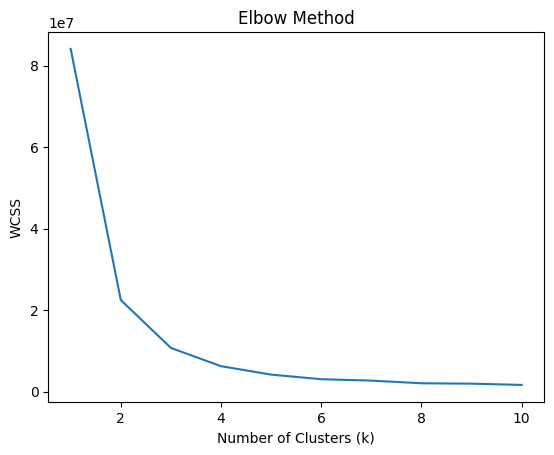

In [87]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(final_stats)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_stats = pd.DataFrame(all_stats["name"])
cluster_stats["cluster"] = kmeans.fit_predict(final_stats)
cluster_stats

,name,cluster
0,Precious Achiuwa,0
1,Bam Adebayo,2
2,Ochai Agbaji,0
3,Santi Aldama,1
4,Nickeil Alexander-Walker,0
...,...,...
567,Thaddeus Young,3
568,Trae Young,2
569,Omer Yurtseven,3
570,Cody Zeller,3


It worked! Now we can see who is in each cluster.

In [88]:
cluster_stats[cluster_stats["cluster"] == 0]

,name,cluster
0,Precious Achiuwa,0
2,Ochai Agbaji,0
4,Nickeil Alexander-Walker,0
8,Jose Alvarado,0
9,Kyle Anderson,0
...,...,...
557,Vince Williams Jr.,0
559,Ziaire Williams,0
563,James Wiseman,0
565,Christian Wood,0


In [89]:
cluster_stats[cluster_stats["cluster"] == 1]

,name,cluster
3,Santi Aldama,1
5,Grayson Allen,1
6,Jarrett Allen,1
12,Cole Anthony,1
13,OG Anunoby,1
...,...,...
529,P.J. Washington,1
537,Russell Westbrook,1
540,Derrick White,1
544,Andrew Wiggins,1


In [90]:
cluster_stats[cluster_stats["cluster"] == 2]

,name,cluster
1,Bam Adebayo,2
10,Giannis Antetokounmpo,2
24,Paolo Banchero,2
49,Bogdan Bogdanović,2
53,Devin Booker,2
60,Mikal Bridges,2
61,Miles Bridges,2
70,Jaylen Brown,2
75,Jalen Brunson,2
111,Cade Cunningham,2


In [91]:
cluster_stats[cluster_stats["cluster"] == 3]

,name,cluster
7,Timmy Allen,3
11,Thanasis Antetokounmpo,3
14,Ryan Arcidiacono,3
17,Udoka Azubuike,3
18,Ibou Badji,3
...,...,...
564,Isaiah Wong,3
566,Delon Wright,3
567,Thaddeus Young,3
569,Omer Yurtseven,3
